In [1]:
#importing libraries
# from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [2]:
#Read dataset
redwine_data = pd.read_csv('winequality-red.csv',sep=';')
redwine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#Renaming columns
redwine_data.rename(columns={'fixed acidity':'fixed_acidity','volatile acidity':'volatile_acidity',\
                            'citric acid':'citric_acid','residual sugar':'residual_sugar','free sulfur dioxide':\
                             'free_sulfur_dioxide','total sulfur dioxide':'total_sulfur_dioxide'}, inplace=True)

In [4]:
redwine_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#Checking nulls
redwine_data.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
#Summary
redwine_data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


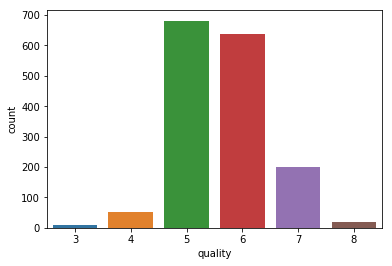

In [7]:
#Look at distribution for wine quality
ax = sns.countplot(x=redwine_data["quality"], data=redwine_data)

## Feature selection using Pearson correlation

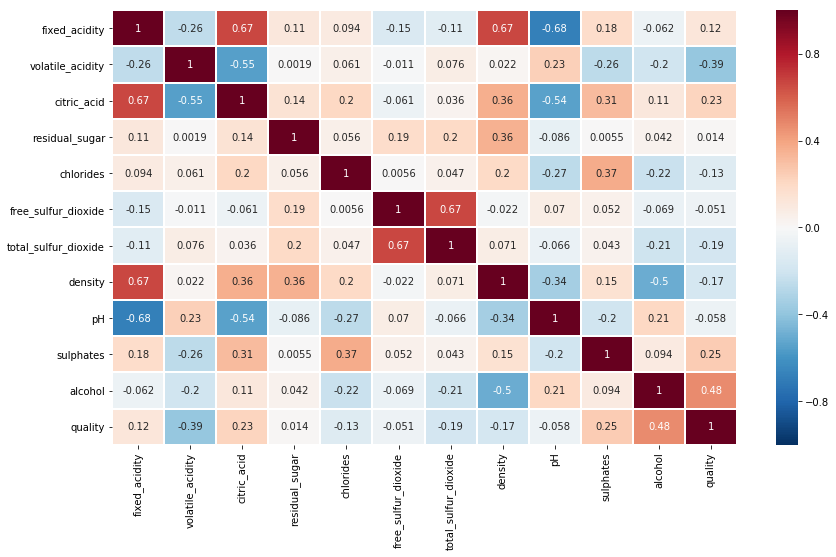

In [8]:
#Pearson correlation - Filter Method
corr = redwine_data.corr()
plt.figure(figsize=(14,8))
sns.heatmap(corr, annot=True, linewidths=1, vmin=-1, cmap='RdBu_r')
plt.show()

In [9]:
#Correlation of features with wine quality
corr_target = abs(corr["quality"])
#Selecting highly correlated features
relevant_features = corr_target[corr_target>0.1]
relevant_features.sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
volatile_acidity        0.390558
sulphates               0.251397
citric_acid             0.226373
total_sulfur_dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed_acidity           0.124052
Name: quality, dtype: float64

### Correlation among selected features

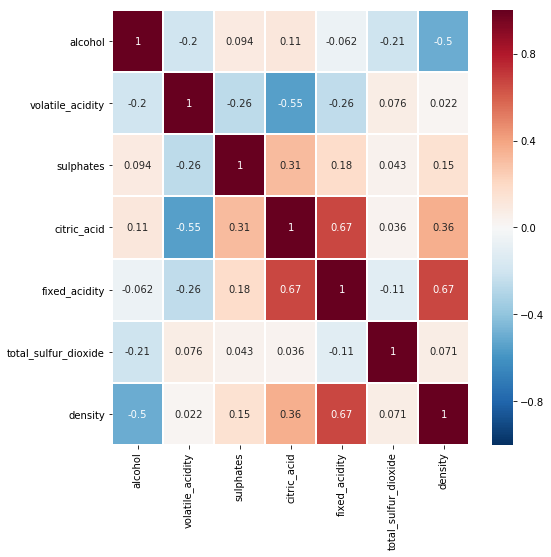

In [10]:
feat_corr = redwine_data[["alcohol","volatile_acidity","sulphates","citric_acid","fixed_acidity","total_sulfur_dioxide",\
                    "density"]].corr()
plt.figure(figsize=(8,8))
sns.heatmap(feat_corr, annot=True, linewidths=1, vmin=-1, cmap='RdBu_r')
plt.show()

In [28]:
#Alternatively we can find correlation this way
print(redwine_data[["alcohol","volatile_acidity","sulphates","citric_acid","fixed_acidity","total_sulfur_dioxide",\
                    "density"]].corr())

                       alcohol  volatile_acidity  sulphates  citric_acid  \
alcohol               1.000000         -0.202288   0.093595     0.109903   
volatile_acidity     -0.202288          1.000000  -0.260987    -0.552496   
sulphates             0.093595         -0.260987   1.000000     0.312770   
citric_acid           0.109903         -0.552496   0.312770     1.000000   
fixed_acidity        -0.061668         -0.256131   0.183006     0.671703   
total_sulfur_dioxide -0.205654          0.076470   0.042947     0.035533   
density              -0.496180          0.022026   0.148506     0.364947   

                      fixed_acidity  total_sulfur_dioxide   density  
alcohol                   -0.061668             -0.205654 -0.496180  
volatile_acidity          -0.256131              0.076470  0.022026  
sulphates                  0.183006              0.042947  0.148506  
citric_acid                0.671703              0.035533  0.364947  
fixed_acidity              1.000000      

#### Let us look for correlation above 60%.  
* citric acid and fixed acidity are positively correlated. 
* density and fixed acidity are also positively correlated.
So we will eliminate fixed acidity

#### Final list of important features

In [12]:
imp_features = redwine_data.loc[:,["alcohol","volatile_acidity","sulphates","citric_acid","total_sulfur_dioxide","density"]]
imp_features.head()

,alcohol,volatile_acidity,sulphates,citric_acid,total_sulfur_dioxide,density
0,9.4,0.70,0.56,0.00,34.0,0.9978
1,9.8,0.88,0.68,0.00,67.0,0.9968
2,9.8,0.76,0.65,0.04,54.0,0.9970
3,9.8,0.28,0.58,0.56,60.0,0.9980
4,9.4,0.70,0.56,0.00,34.0,0.9978


## Feature selection using Embedded Method - Ridge, Lasso and Elastic Net

In [13]:
X = redwine_data.drop('quality',1)   #Feature Matrix
y = redwine_data['quality'].values.reshape(-1, 1)         #Target Variable
print(X.shape,y.shape)

(1599, 11) (1599, 1)


In [14]:
#Lasso
reg = LassoCV()
reg.fit(X, y)

print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.005650
Best score using built-in LassoCV: 0.344854


C:\Users\18137\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\18137\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [29]:
coef

fixed_acidity           0.030220
volatile_acidity       -0.974597
citric_acid            -0.000000
residual_sugar          0.000000
chlorides              -0.000000
free_sulfur_dioxide     0.004803
total_sulfur_dioxide   -0.003072
density                -0.000000
pH                     -0.000000
sulphates               0.508058
alcohol                 0.301986
dtype: float64

In [15]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 6 variables and eliminated the other 5 variables


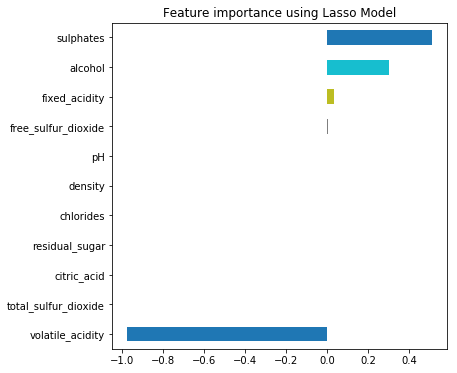

In [16]:
#Plot important features
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")
plt.show()

# Applying Linear Regression using Lasso Model
Regularization methods are the most commonly used embedded methods which penalize a feature given a coefficient threshold.
Here we will do feature selection using Lasso regularization. If the feature is irrelevant, lasso penalizes it’s coefficient and make it 0. Hence the features with coefficient = 0 are removed and the rest are taken.

In [17]:
X = redwine_data.drop('quality',1)   #Feature Matrix
y = redwine_data['quality'].values.reshape(-1, 1)         #Target Variable
print(X.shape,y.shape)

(1599, 11) (1599, 1)


In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

from sklearn.preprocessing import StandardScaler
# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X)
y_scaler = StandardScaler().fit(y)
X_scaled = X_scaler.transform(X)
y_scaled = y_scaler.transform(y)

C:\Users\18137\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\18137\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


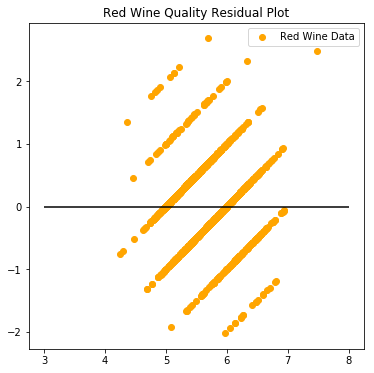

In [19]:
# Residual plot 
plt.scatter(model.predict(X), model.predict(X) - y, c="orange", label="Red Wine Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Red Wine Quality Residual Plot")
plt.show()

If the points in a residual plot are randomly dispersed around the horizontal axis, a linear regression model is appropriate for the data; otherwise, a non-linear model is more appropriate.
#### Coclusion
Since there is a pattern in the data, we will choose a non-linear model. 

## Classification Methods

In [20]:
# #Defining the splits for wine quality. 1–4 will be poor quality, 5–6 will be average, 7–10 will be great
bins = [1,4,6,10]
#0 for low quality, 1 for average, 2 for great quality
quality_labels=[0,1,2]
redwine_data['quality_class'] = pd.cut(redwine_data['quality'], bins=bins, labels=quality_labels, include_lowest=True)
#Displays the first 2 columns
# display(redwine_data.head(n=10))
redwine_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


### Finding Outliers

C:\Users\18137\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\18137\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\18137\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\18137\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


''

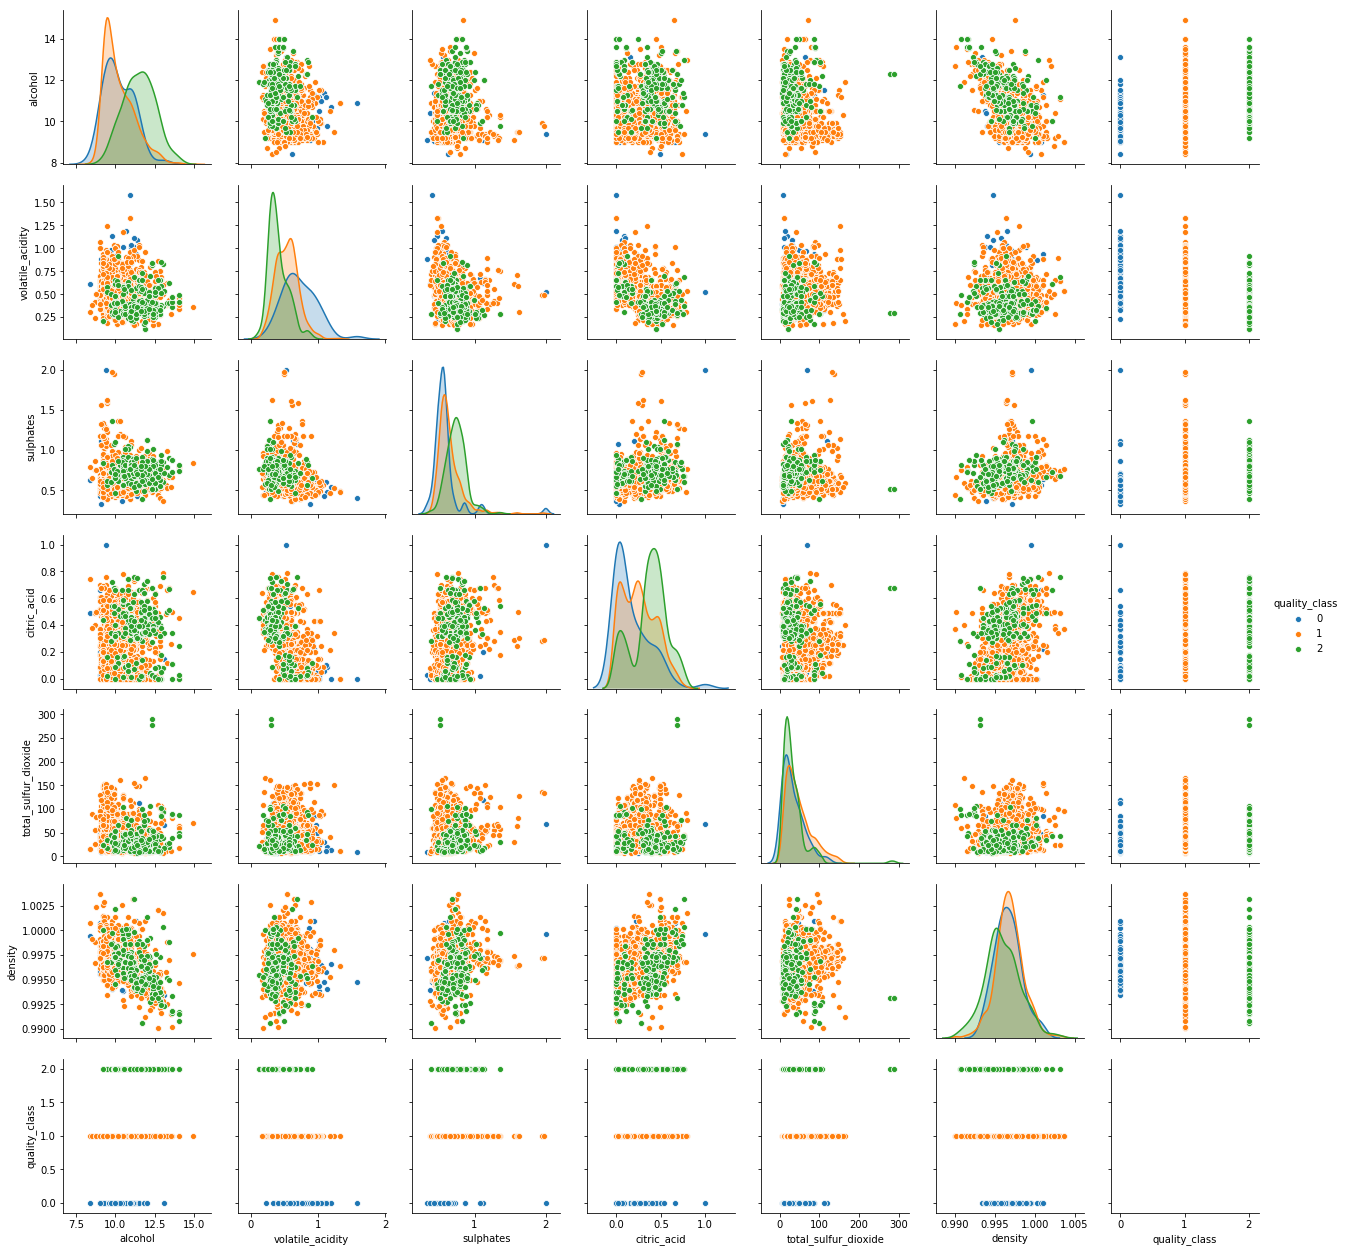

In [21]:
# imp_features = redwine_data.loc[:,["alcohol","volatile_acidity","sulphates","citric_acid","total_sulfur_dioxide","density"]]
# imp_features.head()
# # Plot
data = redwine_data.loc[:,["alcohol","volatile_acidity","sulphates","citric_acid","total_sulfur_dioxide","density","quality_class"]]
sns.pairplot(data, hue='quality_class')
;

#### Total sulfur dioxide
In the EU the maximum levels of sulfur dioxide that a wine can contain are 210 ppm for white wine, 400 ppm for sweet wines — and 160 ppm for red wine. Quite similar levels apply in the U.S., Australia and around the world.
https://www.thekitchn.com/the-truth-about-sulfites-in-wine-myths-of-red-wine-headaches-100878
The amount of sulphur dioxide winemakers are allowed to add is strictly controlled to a limit of 250 milligrams per litre.
https://www.wineselectors.com.au/selector-magazine/wine/preserving-the-truth-on-sulphates-in-wine

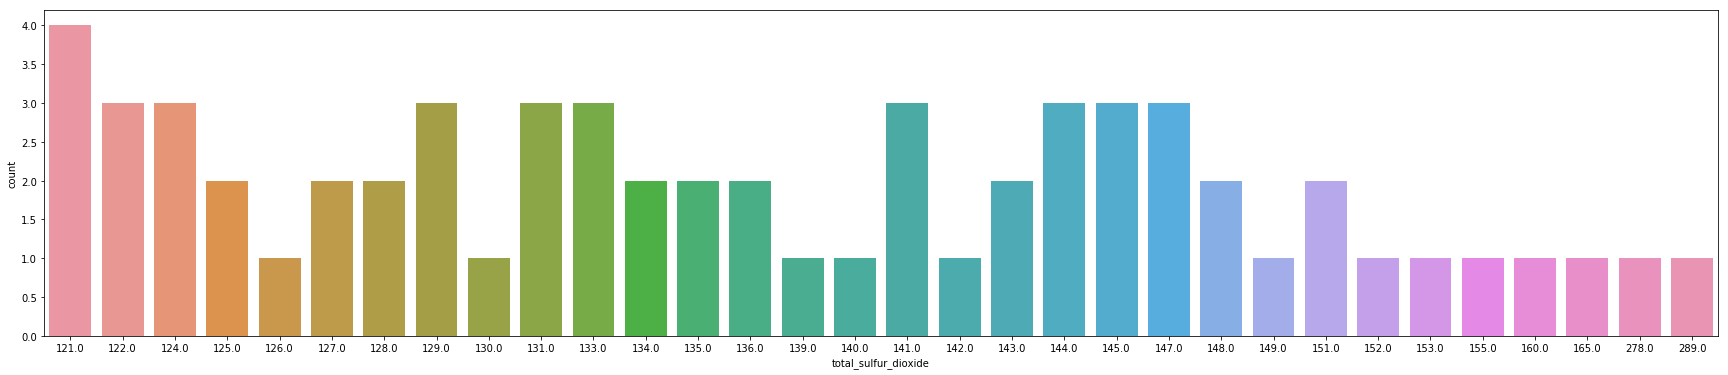

In [22]:
plt.figure(figsize=(30,6))
ax = sns.countplot(x="total_sulfur_dioxide", data=redwine_data[redwine_data.total_sulfur_dioxide > 120])

In [23]:
redwine_data[redwine_data.total_sulfur_dioxide > 160]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_class
354,6.1,0.21,0.40,1.4,0.066,40.5,165.0,0.99120,3.25,0.59,11.9,6,1
1079,7.9,0.30,0.68,8.3,0.050,37.5,278.0,0.99316,3.01,0.51,12.3,7,2
1081,7.9,0.30,0.68,8.3,0.050,37.5,289.0,0.99316,3.01,0.51,12.3,7,2


#### Citric acid
The predominant fixed acids found in wines are tartaric, malic, citric, and succinic.  Their respective levels found in wine can vary greatly but in general one would expect to see 1,000 to 4,000 mg/L tartaric acid, 0 to 8,000 mg/L malic acid, 0 to 500 mg/L citric acid, and 500 to 2,000 mg/L succinic acid.
https://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity

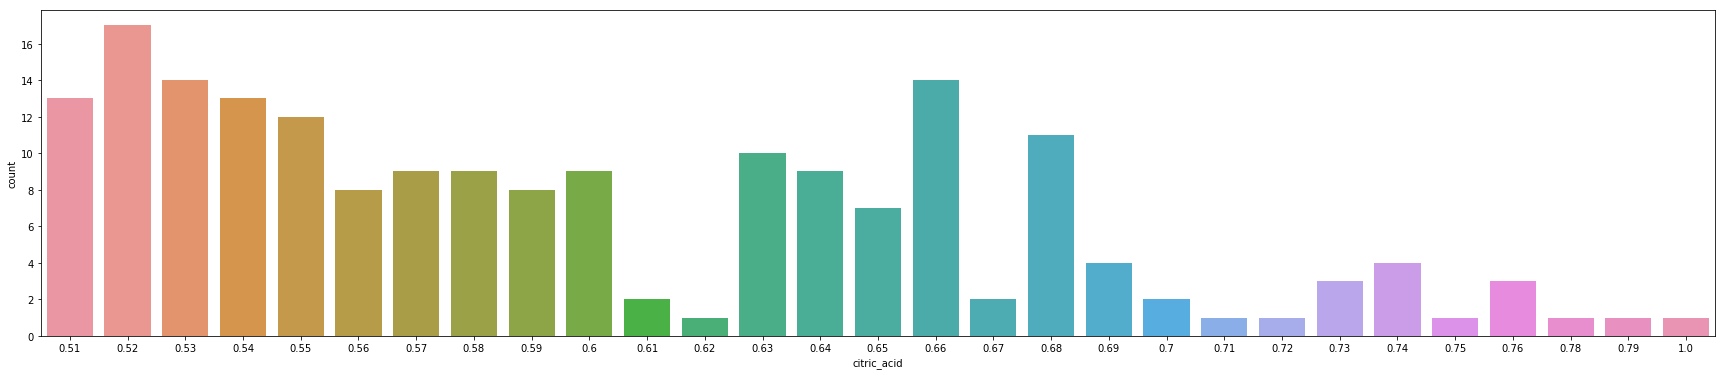

In [24]:
plt.figure(figsize=(30,6))
# ax = sns.countplot(x=redwine_data["citric_acid"], data=redwine_data)
ax = sns.countplot(x="citric_acid", data=redwine_data[redwine_data.citric_acid > 0.5])

In [25]:
redwine_data[redwine_data.citric_acid > 0.8]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_class
151,9.2,0.52,1.0,3.4,0.61,32.0,69.0,0.9996,2.74,2.0,9.4,4,0


#### Volatile acidity
Volatile acidity is mostly caused by bacteria in the wine creating acetic acid — the acid that gives vinegar its characteristic flavor and aroma.
https://winemakermag.com/article/676-the-perils-of-volatile-acidity

### Eliminating Outliers

In [26]:
redwine_df_trimmed = redwine_data.drop(redwine_data[(redwine_data.citric_acid > 0.9 ) | \
                                                    (redwine_data.total_sulfur_dioxide > 165)].index)
redwine_df_trimmed.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,8.319612,0.528111,0.270006,2.531046,0.087186,15.837719,46.156642,0.996749,3.311848,0.657494,10.421272,5.635338
std,1.742530,0.179046,0.193584,1.396242,0.045236,10.434073,31.831338,0.001883,0.153497,0.166222,1.064287,0.805843
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997832,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,0.790000,15.500000,0.611000,72.000000,165.000000,1.003690,4.010000,1.980000,14.900000,8.000000


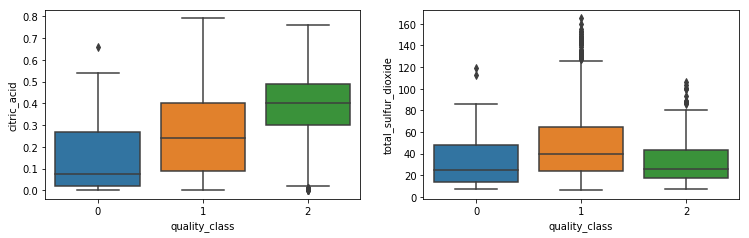

In [27]:
#Plotting columns after removing outliers
plt.figure(figsize=(26,16))
no_outliers = redwine_df_trimmed.loc[:,["citric_acid","total_sulfur_dioxide","quality_class"]]
# outliers = redwine_df_trimmed.loc[:,redwine_df_trimmed['citric_acid','total_sulfur_dioxide','quality_categorical']]
for column_index, column in enumerate(no_outliers.columns):
    if column == 'quality_class':
        continue
    plt.subplot(4, 4, column_index + 1)
    sns.boxplot(x='quality_class', y=column, data=no_outliers)

### Clean Dataset for modeling

In [32]:
redwine_df_clean = redwine_df_trimmed.loc[:,["alcohol","volatile_acidity","sulphates","citric_acid","total_sulfur_dioxide",\
                                             "density","quality","quality_class"]]
redwine_df_clean.head()

,alcohol,volatile_acidity,sulphates,citric_acid,total_sulfur_dioxide,density,quality,quality_class
0,9.4,0.70,0.56,0.00,34.0,0.9978,5,1
1,9.8,0.88,0.68,0.00,67.0,0.9968,5,1
2,9.8,0.76,0.65,0.04,54.0,0.9970,5,1
3,9.8,0.28,0.58,0.56,60.0,0.9980,6,1
4,9.4,0.70,0.56,0.00,34.0,0.9978,5,1


In [34]:
#Export dataframe to csv
redwine_df_clean.to_csv('redwine_clean_data.csv', index = None, header=True)

In [59]:
redwine_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596 entries, 0 to 1598
Data columns (total 8 columns):
alcohol                 1596 non-null float64
volatile_acidity        1596 non-null float64
sulphates               1596 non-null float64
citric_acid             1596 non-null float64
total_sulfur_dioxide    1596 non-null float64
density                 1596 non-null float64
quality                 1596 non-null int64
quality_class           1596 non-null int64
dtypes: float64(6), int64(2)
memory usage: 192.2 KB


# Data Modeling

### 1. Prepare target and feature sets

In [195]:
X = redwine_df_clean.drop(["quality","quality_class"], axis=1)
y = redwine_df_clean["quality_class"]
print(X.shape, y.shape)

(1596, 6) (1596,)


In [196]:
# Converting quality_class to integer type
redwine_df_clean["quality_class"]=redwine_df_clean["quality_class"].astype('int64')
redwine_df_clean['quality_class'].dtype

dtype('int64')

### 2. Split dataset into training and testing 

In [197]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1, stratify=y)

In [198]:
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1197 samples.
Testing set has 399 samples.


### 3. Define a function to fit the model and evaluate it

In [237]:
from time import time
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

def model_scores(learner, X_train, y_train, X_test, y_test):
    results = {}
    learner=learner.fit(X_train, y_train)
    predictions_train = learner.predict(X_train)
    predictions_test = learner.predict(X_test)
    results['acc_train'] = accuracy_score(y_train, predictions_train)
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    results['f_train'] = fbeta_score(y_train, predictions_train, beta=0.5, average='micro')
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5, average='micro')
    return results

### 4. Define Classification models to test
* LogisticRegression
* Decision Tree
* Random Forest Classifier
* KNeighbors Classifier
* Support vector machine linear classifier

In [254]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
clf_A = LogisticRegression()
clf_B = DecisionTreeClassifier(max_depth=None, random_state=None)
clf_C = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=None)
clf_D = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
clf_E = SVC(kernel = 'linear', random_state = 0)
clf_F = GaussianNB()

results = {}

for clf in [clf_A, clf_B, clf_C,clf_D,clf_E,clf_F]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    results[clf_name] = model_scores(clf, X_train, y_train, X_test, y_test)

C:\Users\18137\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\18137\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [255]:
results

{'LogisticRegression': {'acc_train': 0.835421888053467,
  'acc_test': 0.8320802005012531,
  'f_train': 0.835421888053467,
  'f_test': 0.8320802005012531},
 'DecisionTreeClassifier': {'acc_train': 1.0,
  'acc_test': 0.8220551378446115,
  'f_train': 1.0,
  'f_test': 0.8220551378446115},
 'RandomForestClassifier': {'acc_train': 1.0,
  'acc_test': 0.8721804511278195,
  'f_train': 1.0,
  'f_test': 0.8721804511278195},
 'KNeighborsClassifier': {'acc_train': 0.8671679197994987,
  'acc_test': 0.8045112781954887,
  'f_train': 0.8671679197994987,
  'f_test': 0.8045112781954887},
 'SVC': {'acc_train': 0.8262322472848789,
  'acc_test': 0.8270676691729323,
  'f_train': 0.8262322472848789,
  'f_test': 0.8270676691729323},
 'GaussianNB': {'acc_train': 0.8203842940685045,
  'acc_test': 0.8170426065162907,
  'f_train': 0.8203842940685045,
  'f_test': 0.8170426065162907}}

### 5. Compare F1 scores and accuracy of all models
* In our example, our output is highly skewed towards average wine quality. So, accuracy is not a good indicator of performance. 
* Therefore, we are plotting F1 score which is the harmonic average of precision and recall

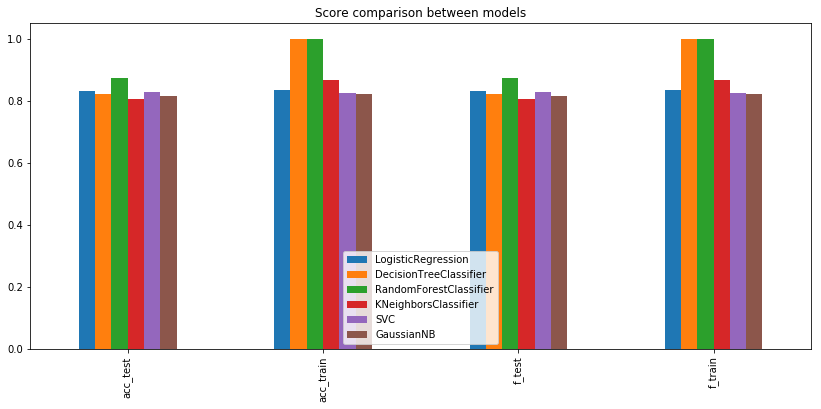

In [264]:
model_df = pd.DataFrame(results)
model_df.plot(kind="bar", stacked=False, figsize=(14,6), title = "Score comparison between models")
plt.show()